<p style="text-align: center;">МИНИСТЕРСТВО ОБРАЗОВАНИЯ И НАУКИ
РОССИЙСКОЙ ФЕДЕРАЦИИ

<p style="text-align: center;">Федеральное государственное автономное
образовательное учреждение высшего образования
«Самарский национальный исследовательский университет
имени академика С. П. Королева»
(Самарский университет)</p>
<br>
<br>
<br>

<p style="text-align: center;">Институт информатики и кибернетики
    
<p style="text-align: center;">Факультет информатики
    
<p style="text-align: center;">Кафедра технической кибернетики
    
 <br><br><br>   

<p style="text-align: center;">ОТЧЁТ

<p style="text-align: center;">по лабораторной работе № 2
<p style="text-align: center;">«Кластерный анализ»
<p style="text-align: center;">по курсу «Интеллектуальный анализ данных и большие данные»

<p style="text-align: center;">Вариант 20
<br><br><br><br><br><br><br><br>







<p style="text-align: right;">Выполнил: Толч А.Н.
<p style="text-align: right;">гр. 6132-020402D
<p style="text-align: right;">Проверил: Попов С. Б.
<br><br><br><br><br><br><br><br><br>








<p style="text-align: center;">Самара 2022


<b>Задание на лабораторную работу</b>


Входные данные: n объектов, каждый из которых характеризуется двумя числовыми признаками x и y, а также номером класса c.

Требуется исследовать работу алгоритмов кластеризации объектов наблюдения по двум признакам. Для каждого набора данных требуется выполнить следующие задания.
1. Провести кластеризацию объектов наблюдения с помощью алгоритма k внутригрупповых средних.
2. Графически изобразить на плоскости разбиения объектов наблюдения в соответствии с кластерами и в соответствии с классами c. Также отметить центры каждого кластера. Количество кластеров должно соответствовать количеству классов.
3.Для разбиения на кластеры вычислить сумму квадратов расстояний от каждого объекта наблюдения до центра соответствующего кластера.



<b>Данные для варианта 20:</b>

Название файла: parkinsons.data Ссылка: http://archive.ics.uci.edu/ml/datasets/Parkinsons

Первый признак: MDVP:Fhi(Hz) (столбец 3)

Второй признак: MDVP:Flo(Hz) (столбец 4)

Класс: status (столбец 18)

<b>Ход работы</b>

1. Для начала импортируем все необходимые для выполнения работы библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
from sklearn import datasets
from sklearn.cluster import KMeans

2. Считаем датасет в таблицу и выделим из всей таблицы только те данные, которые необходимы для дальнейшего анализа

In [23]:
data = np.genfromtxt('parkinsons.data', delimiter=',', skip_header=True)
relevant_data = data[:, [2, 3, 17]]
print(relevant_data)

[[157.302  74.997   1.   ]
 [148.65  113.819   1.   ]
 [131.111 111.555   1.   ]
 [137.871 111.366   1.   ]
 [141.781 110.655   1.   ]
 [131.162 113.787   1.   ]
 [137.244 114.82    1.   ]
 [113.84  104.315   1.   ]
 [132.068  91.754   1.   ]
 [120.103  91.226   1.   ]
 [112.24   84.072   1.   ]
 [115.871  86.292   1.   ]
 [159.866 131.276   1.   ]
 [179.139  76.556   1.   ]
 [163.305  75.836   1.   ]
 [217.455  83.159   1.   ]
 [349.259  82.764   1.   ]
 [232.181  75.603   1.   ]
 [175.829  68.623   1.   ]
 [189.398 142.822   1.   ]
 [165.738  65.782   1.   ]
 [172.86   78.128   1.   ]
 [193.221  79.068   1.   ]
 [192.735  86.18    1.   ]
 [200.841  76.779   1.   ]
 [206.002  77.968   1.   ]
 [208.313  75.501   1.   ]
 [208.701  81.737   1.   ]
 [227.383  80.055   1.   ]
 [198.346  77.63    1.   ]
 [206.896 192.055   0.   ]
 [209.512 192.091   0.   ]
 [215.203 193.104   0.   ]
 [211.604 197.079   0.   ]
 [211.526 196.16    0.   ]
 [210.565 195.708   0.   ]
 [192.921 168.013   1.   ]
 

3. Зададим количество кластеров для нашей модели равное количеству классов в датасете.

In [14]:
df = pd.DataFrame({'1': relevant_data[:, 0],
                   '2': relevant_data[:, 1]})
length_of_classes = len(np.unique(relevant_data[:, 2]))

model = KMeans(n_clusters=length_of_classes)

model.fit(df)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

4. Посмотрим результат разбиения данных на кластеры и координаты центров

In [15]:
labels = model.labels_
print(labels)

centers = model.cluster_centers_
print(centers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0]
[[177.41463388 118.05651913]
 [497.38175     89.91333333]]


5. Построим графики реальных данных и результаты кластеризации

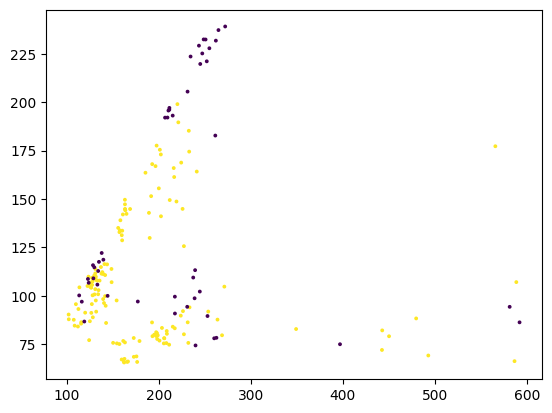

In [16]:
plt.scatter(relevant_data[:, 0], relevant_data[:, 1], c=(relevant_data[:, 2] * 10).astype(np.int32), s=3)
plt.show()

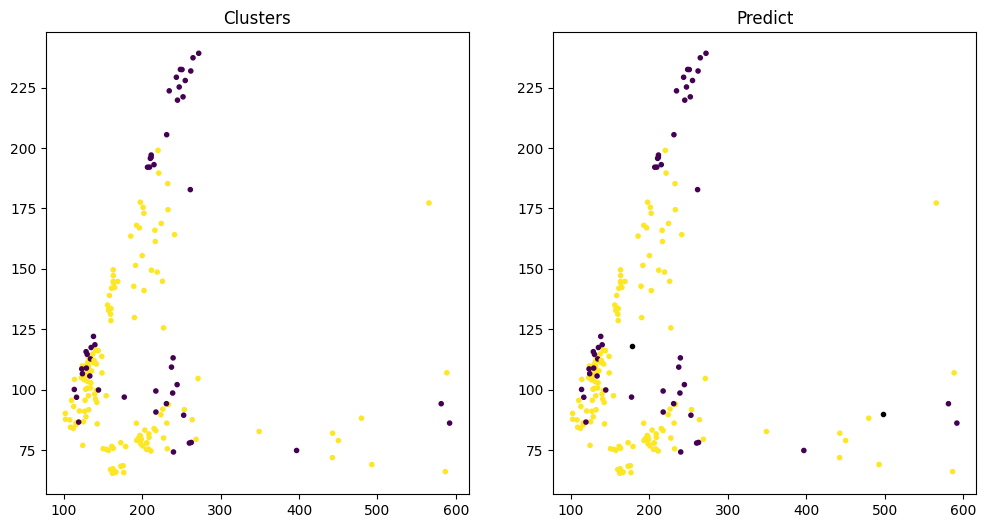

In [17]:
# Модель прогнозирующей кластеризации
pre_y = model.predict(df)

# Создать холст
plt.figure(figsize=(12,6))
titles = ['Clusters', 'Predict']
for j, y_ in enumerate([model.labels_, pre_y]):
    plt.subplot(1,2, j+1)
    plt.title(titles[j])
    # Циклическое чтение категории
    for i in range(length_of_classes):
        # Найти тот же индекс
        index_sets = np.where(y_ == i)
        # Разделите данные того же класса на подмножество кластеризации
        cluster = relevant_data[index_sets]
        # Отображение точек выборки
        plt.scatter(cluster[:, 0], cluster[:, 1], c=(cluster[:, 2] * 10).astype(np.int32), marker='.')
        if j==1:          
        # Кластерный центр
            plt.plot(centers[i][0], centers[i][1], 'o',markerfacecolor='black',markeredgecolor='k', markersize=3)

plt.show()

6. Посчитаем суммы квадратов расстояний от каждого объекта до его центра

In [24]:
print(model.inertia_)

829510.3181590696
